In [18]:
from mylib import base, dataset
from mylib.model_classification import ModelClass
from mylib.model_base import ModelBase
from mylib.base import st, ft

from dotenv import dotenv_values
from pathlib import Path
from pprint import pprint, pformat

import pandas as pd
import pandas.api.types as pd_types

import numpy as np

import plotly.express as plotly_px

import joblib

import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50) # Устанавливаем максимальное количество отображаемых столбцов равным 50
#pd.set_option('display.max_rows', 50) # Устанавливаем максимальное количество отображаемых строк равным 20
pd.options.display.float_format = '{:.5f}'.format # Устанавливаем формат отображения чисел с двумя знаками после запятой
pd.options.mode.use_inf_as_na = True # Настройка режима Pandas для рассмотрения бесконечностей (inf) как пропущенных значений (NA)

# Конфигурация формата отображения графиков в виде векторных изображений
%config InlineBackend.figure_format = 'svg'

# для построения графиков внутри Jupyter Notebook
%matplotlib inline

# Загрузка конфигов

In [20]:
# загрузить параметры
settings_dict = {
    **dotenv_values("settings")
}

settings = base.Settings(settings_dict)
settings.enviroment["RANDOM_STATE"] = int(settings.enviroment["RANDOM_STATE"])
n_jobs = -1
verbose = 3


In [21]:
settings.enviroment

{'DATASET_SUBFOLDER': 'dataset',
 'RESULT_SUBFOLDER': 'result',
 'CACHE_SUBFOLDER': 'cached_results',
 'BOXPLOT_SUBFOLDER': 'boxplot',
 'RANDOM_STATE': 42,
 'DATASET_FILENAME_TEMPLATE': 'dataset_df_%s.joblib',
 'PARAMS_FILENAME_TEMPLATE': 'params_%s.joblib',
 'X_Train_FILENAME_TEMPLATE': 'X_Train_%s.joblib',
 'y_Train_FILENAME_TEMPLATE': 'y_Train_%s.joblib',
 'X_Test_FILENAME_TEMPLATE': 'X_Test_%s.joblib',
 'y_Test_FILENAME_TEMPLATE': 'y_Test_%s.joblib',
 'GRID_SEARCH_TEMPLATE_FILENAME': '03_GridSearch_%s.joblib',
 'MODEL_CLASS_TEMPLATE_FILENAME': '04_model_%s.joblib'}

# Загрузка датасета

In [23]:
params = joblib.load(Path(settings.result_folder, settings.enviroment["PARAMS_FILENAME_TEMPLATE"]  % "common"))

In [24]:
df_clean_if = joblib.load(Path(settings.result_folder, settings.enviroment["DATASET_FILENAME_TEMPLATE"] % "df_clean_if"))
y_train = joblib.load(Path(settings.result_folder, settings.enviroment["y_Train_FILENAME_TEMPLATE"] % "big"))
y_test  = joblib.load(Path(settings.result_folder, settings.enviroment["y_Test_FILENAME_TEMPLATE"] % "big"))
X_train = joblib.load(Path(settings.result_folder, settings.enviroment["X_Train_FILENAME_TEMPLATE"] % "big"))
X_test  = joblib.load(Path(settings.result_folder, settings.enviroment["X_Test_FILENAME_TEMPLATE"] % "big"))
X_train_StandardScaler = joblib.load(Path(settings.result_folder, settings.enviroment["X_Train_FILENAME_TEMPLATE"] % "big_StandardScaler,"))
X_test_StandardScaler  = joblib.load(Path(settings.result_folder, settings.enviroment["X_Test_FILENAME_TEMPLATE"]  % "big_StandardScaler,"))

# Модель KNeighborsClassifier

In [25]:
import sklearn.neighbors
KNN_Classifier = sklearn.neighbors.KNeighborsClassifier
knn_params = {'n_neighbors': range(5, 21),
                'p': [1, 2, 3]
                }
knn_model_name = "KNN_sklearn"

In [26]:
s = st()
knn_grid_search = ModelBase.load_or_create_and_fit_GridSearchCV(knn_model_name, 
                                                                KNN_Classifier, 
                                                                knn_params,
                                                                X_train_StandardScaler, y_train, settings,
                                                                n_jobs=n_jobs, 
                                                                verbose=verbose,
                                                                scoring='accuracy')
knn_durarion_search = ft(s)

Создается и выполняется RandomizedSearchCV для модели KNN_sklearn класса KNeighborsClassifier
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 2/5] END ................n_neighbors=5, p=2;, score=0.670 total time=   0.5s
[CV 5/5] END ................n_neighbors=5, p=2;, score=0.682 total time=   0.6s
[CV 3/5] END ................n_neighbors=5, p=2;, score=0.691 total time=   0.6s
[CV 1/5] END ................n_neighbors=5, p=2;, score=0.686 total time=   0.7s
[CV 4/5] END ................n_neighbors=5, p=2;, score=0.680 total time=   0.7s
[CV 1/5] END ................n_neighbors=6, p=2;, score=0.681 total time=   0.4s
[CV 2/5] END ................n_neighbors=6, p=2;, score=0.671 total time=   0.6s
[CV 3/5] END ................n_neighbors=6, p=2;, score=0.688 total time=   0.6s
[CV 4/5] END ................n_neighbors=6, p=2;, score=0.687 total time=   0.7s
[CV 5/5] END ................n_neighbors=6, p=2;, score=0.677 total time=   0.7s
[CV 3/5] END ................n_nei

In [27]:
print("\nПодобранные гиперпараметры модели:")
pprint(knn_grid_search.best_params_)
print(knn_grid_search.best_score_)       


Подобранные гиперпараметры модели:
{'n_neighbors': 20, 'p': 1}
0.707477126620142


In [28]:
s = st()
knn_model = ModelClass.load_or_create_and_fit_model(knn_model_name, KNN_Classifier, 
                                                    knn_grid_search.best_params_, 
                                                    X_train_StandardScaler, X_test_StandardScaler, y_train, y_test,
                                                    settings)
knn_duration_fit = ft(s)

Создается и тренируется модель KNN_sklearn класса KNeighborsClassifier
Гиперпараметры модели: {'p': 1, 'n_neighbors': 20}

Класс-обвертка модели сохранен в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/04_model_KNN_sklearn.joblib

Натренированная модель сохранена в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/04_model_KNN_sklearn_trained.joblib
Затрачено времени: 3.75 секунд


In [30]:
knn_model.show_quality()

# Модель SVC

In [31]:
print('Используется sklearn.svm.SVC')
import sklearn.svm
SVC_Classifier = sklearn.svm.SVC
svc_params = {'C': [0.01, 0.1, 1, 5, 10],
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'probability': [True]
            }
svc_model_name = "SVC_sklearn"

Используется sklearn.svm.SVC


In [32]:
s = st()
svc_grid_search = ModelBase.load_or_create_and_fit_GridSearchCV(svc_model_name, 
                                                                SVC_Classifier,
                                                                svc_params,
                                                                X_train_StandardScaler, y_train, settings,
                                                                n_jobs=n_jobs, 
                                                                verbose=verbose,
                                                                scoring='accuracy',
                                                                n_iter=10)
svc_durarion_search = ft(s)

Создается и выполняется RandomizedSearchCV для модели SVC_sklearn класса SVC
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END C=0.01, kernel=linear, probability=True;, score=0.718 total time= 4.1min
[CV 3/5] END C=0.01, kernel=linear, probability=True;, score=0.726 total time= 4.1min
[CV 2/5] END C=0.01, kernel=linear, probability=True;, score=0.702 total time= 4.2min
[CV 5/5] END C=0.01, kernel=linear, probability=True;, score=0.718 total time= 4.3min
[CV 1/5] END C=0.01, kernel=linear, probability=True;, score=0.727 total time= 4.4min
[CV 2/5] END C=5, kernel=sigmoid, probability=True;, score=0.630 total time= 5.1min
[CV 5/5] END C=5, kernel=sigmoid, probability=True;, score=0.632 total time= 5.5min
[CV 2/5] END C=0.01, kernel=poly, probability=True;, score=0.702 total time= 5.6min
[CV 3/5] END C=0.01, kernel=poly, probability=True;, score=0.716 total time= 5.6min
[CV 4/5] END C=0.01, kernel=poly, probability=True;, score=0.714 total time= 5.6min
[CV 4/5] END

In [33]:
print("\nПодобранные гиперпараметры модели:")
pprint(svc_grid_search.best_params_)
print(svc_grid_search.best_score_)       


Подобранные гиперпараметры модели:
{'C': 10, 'kernel': 'rbf', 'probability': True}
0.7212774694382654


In [34]:
s = st()
svc_model = ModelClass.load_or_create_and_fit_model(svc_model_name, 
                                                    SVC_Classifier, 
                                                    svc_grid_search.best_params_, 
                                                    X_train_StandardScaler, X_test_StandardScaler, y_train, y_test,
                                                    settings)
svc_duration_fit = ft(s)

Создается и тренируется модель SVC_sklearn класса SVC
Гиперпараметры модели: {'probability': True, 'kernel': 'rbf', 'C': 10}

Класс-обвертка модели сохранен в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/04_model_SVC_sklearn.joblib

Натренированная модель сохранена в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/04_model_SVC_sklearn_trained.joblib
Затрачено времени: 239.12 секунд


In [35]:
svc_model.show_quality()

# Модель RandomForestClassifier

In [36]:
import sklearn.ensemble
RFC_Classifier = sklearn.ensemble.RandomForestClassifier
rfc_params = {'random_state': [42],
                'n_estimators': [x for x in range(60, 120, 10)],
                'max_depth': [3, 6, 9],
                'min_samples_leaf': [3, 5, 7],
                'min_samples_split': [3, 5, 7],
                'max_features': ['sqrt', 'log2']
                }
rfc_model_name = "RFC_sklearn"

In [37]:
s = st()
rfc_grid_search = ModelBase.load_or_create_and_fit_GridSearchCV(rfc_model_name,
                                                                RFC_Classifier, 
                                                                rfc_params,
                                                                X_train, y_train, settings,
                                                                n_jobs=n_jobs, 
                                                                verbose=verbose,
                                                                scoring='accuracy')
rfc_durarion_search = ft(s)

Создается и выполняется RandomizedSearchCV для модели RFC_sklearn класса RandomForestClassifier
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=60, random_state=42;, score=0.724 total time=   1.0s
[CV 2/5] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=60, random_state=42;, score=0.704 total time=   1.0s
[CV 3/5] END max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=60, random_state=42;, score=0.721 total time=   1.0s
[CV 4/5] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=60, random_state=42;, score=0.715 total time=   1.0s
[CV 5/5] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=60, random_state=42;, score=0.711 total time=   1.0s
[CV 2/5] END max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_spli

In [38]:
print("\nПодобранные гиперпараметры модели:")
pprint(rfc_grid_search.best_params_)
print(rfc_grid_search.best_score_)       


Подобранные гиперпараметры модели:
{'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 60,
 'random_state': 42}
0.7252769753699976


In [39]:
s = st()
rfc_model = ModelClass.load_or_create_and_fit_model(rfc_model_name, 
                                                    RFC_Classifier, 
                                                    rfc_grid_search.best_params_, 
                                                    np.array(X_train), np.array(X_test), y_train, y_test,
                                                    settings)
rfc_duration_fit = ft(s)

Создается и тренируется модель RFC_sklearn класса RandomForestClassifier
Гиперпараметры модели: {'random_state': 42, 'n_estimators': 60, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 9}

Класс-обвертка модели сохранен в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/04_model_RFC_sklearn.joblib

Натренированная модель сохранена в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/04_model_RFC_sklearn_trained.joblib
Затрачено времени: 1.63 секунд


In [40]:
rfc_model.show_quality()

# Модель LogisticRegression

In [41]:
import sklearn.linear_model
LR_Classifier = sklearn.linear_model.LogisticRegression
lr_params = {'C': [0.001, 0.01, 0.02, 0.03, 0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0],
                'penalty': ['l2', 'l1', 'elasticnet', None],
                'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                'max_iter': [500, 1000, 1500],
                'l1_ratio': [0.0, 0.1, 0.25, 0.5, 0.75, 1.0]
            }
logreg_model_name = "LogisticR_sklearn"

In [42]:
s = st()
logreg_grid_search = ModelBase.load_or_create_and_fit_GridSearchCV(logreg_model_name, 
                                                                   LR_Classifier, 
                                                                   lr_params,
                                                                   X_train_StandardScaler, y_train, settings,
                                                                   n_jobs=n_jobs, 
                                                                   verbose=verbose,
                                                                   scoring='accuracy')
logreg_durarion_search = ft(s)

Создается и выполняется RandomizedSearchCV для модели LogisticR_sklearn класса LogisticRegression
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=0.001, l1_ratio=0.75, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.75, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.75, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.75, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, l1_ratio=0.75, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, l1_ratio=0.75, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.5, max_iter=500, penalty=None, solver=lbfgs;, score=0.716 total time=   0.0s
[CV 2/5] END C=0.5, l1_ratio=0.75,

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pe

[CV 3/5] END C=1.0, l1_ratio=0.1, max_iter=1500, penalty=None, solver=newton-cg;, score=0.729 total time=   0.1s
[CV 4/5] END C=1.0, l1_ratio=0.1, max_iter=1500, penalty=None, solver=newton-cg;, score=0.725 total time=   0.1s
[CV 1/5] END C=0.1, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, l1_ratio=1.0, max_iter=1000, penalty=None, solver=lbfgs;, score=0.716 total time=   0.1s
[CV 2/5] END C=0.1, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, l1_ratio=0.0, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, l1_ratio=0.0, max

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is

[CV 5/5] END C=0.01, l1_ratio=1.0, max_iter=500, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s
[CV 4/5] END C=10.0, l1_ratio=1.0, max_iter=1500, penalty=None, solver=newton-cg;, score=0.725 total time=   0.1s
[CV 1/5] END C=0.5, l1_ratio=0.1, max_iter=1500, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, l1_ratio=1.0, max_iter=500, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.1s
[CV 2/5] END C=0.1, l1_ratio=1.0, max_iter=500, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=1.0, max_iter=500, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=1.0, max_iter=500, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, l1_ratio=1.0, max_iter=500, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=5.0, l1_ratio=0.1, max_iter=1500, penalty=l2, solver=liblinear;, score=0.716 total tim

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio pa

[CV 3/5] END C=0.01, l1_ratio=0.75, max_iter=500, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 3/5] END C=5.0, l1_ratio=0.1, max_iter=1500, penalty=l2, solver=liblinear;, score=0.729 total time=   0.2s
[CV 5/5] END C=5.0, l1_ratio=0.1, max_iter=1500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.2s
[CV 4/5] END C=0.01, l1_ratio=0.75, max_iter=500, penalty=l2, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 2/5] END C=0.75, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=liblinear;, score=0.716 total time=   0.1s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None wi

[CV 1/5] END C=5.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=sag;, score=0.727 total time=   0.7s
[CV 3/5] END C=0.75, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=liblinear;, score=0.729 total time=   0.1s
[CV 1/5] END C=0.01, l1_ratio=1.0, max_iter=1000, penalty=None, solver=sag;, score=0.727 total time=   0.8s
[CV 4/5] END C=0.75, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=liblinear;, score=0.725 total time=   0.1s
[CV 1/5] END C=0.001, l1_ratio=0.25, max_iter=1000, penalty=l1, solver=saga;, score=0.715 total time=   0.8s
[CV 3/5] END C=10.0, l1_ratio=0.75, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, l1_ratio=0.75, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, l1_ratio=0.75, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is onl

[CV 5/5] END C=0.75, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=liblinear;, score=0.721 total time=   0.1s
[CV 1/5] END C=0.75, l1_ratio=0.5, max_iter=500, penalty=None, solver=newton-cholesky;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.001, l1_ratio=0.0, max_iter=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.0, max_iter=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.0, max_iter=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.0, max_iter=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.75, l1_ratio=0.5, max_iter=500, penalty=None, solver=newton-cholesky;, score=0.716 total time=   0.0s
[CV 5/5] END C=0.001, l1_ratio=0.0, max_iter=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.75, l1_ratio=0.5, max_iter=500, penalty=None, so

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pe

[CV 4/5] END C=0.01, l1_ratio=1.0, max_iter=1000, penalty=None, solver=sag;, score=0.725 total time=   1.2s
[CV 2/5] END C=0.001, l1_ratio=0.25, max_iter=1000, penalty=l1, solver=saga;, score=0.706 total time=   1.1s
[CV 4/5] END C=0.001, l1_ratio=0.25, max_iter=1000, penalty=l1, solver=saga;, score=0.716 total time=   1.1s
[CV 3/5] END C=10.0, l1_ratio=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.729 total time=   0.1s
[CV 2/5] END C=0.01, l1_ratio=1.0, max_iter=1000, penalty=None, solver=sag;, score=0.716 total time=   1.3s
[CV 1/5] END C=10.0, l1_ratio=0.0, max_iter=500, penalty=None, solver=sag;, score=0.727 total time=   0.7s
[CV 5/5] END C=0.01, l1_ratio=1.0, max_iter=1000, penalty=None, solver=sag;, score=0.721 total time=   1.3s
[CV 5/5] END C=5.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=sag;, score=0.721 total time=   1.2s
[CV 1/5] END C=10.0, l1_ratio=0.25, max_iter=1500, penalty=l2, solver=lbfgs;, score=0.726 total time=   0.0s
[CV 1/5] END C=0.5, l1_rat

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is onl

[CV 3/5] END C=10.0, l1_ratio=0.25, max_iter=1500, penalty=l2, solver=lbfgs;, score=0.729 total time=   0.0s
[CV 4/5] END C=10.0, l1_ratio=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.725 total time=   0.2s
[CV 4/5] END C=10.0, l1_ratio=0.25, max_iter=1500, penalty=l2, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.25, max_iter=500, penalty=l2, solver=lbfgs;, score=0.716 total time=   0.0s
[CV 3/5] END C=5.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=sag;, score=0.729 total time=   1.4s
[CV 3/5] END C=0.1, l1_ratio=0.25, max_iter=500, penalty=l2, solver=lbfgs;, score=0.729 total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=0.25, max_iter=500, penalty=l2, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 5/5] END C=10.0, l1_ratio=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.2s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio pa

[CV 5/5] END C=0.1, l1_ratio=0.25, max_iter=500, penalty=l2, solver=lbfgs;, score=0.722 total time=   0.0s
[CV 1/5] END C=0.01, l1_ratio=0.5, max_iter=1000, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, l1_ratio=0.5, max_iter=1000, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, l1_ratio=0.5, max_iter=1000, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, l1_ratio=0.5, max_iter=1000, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, l1_ratio=0.5, max_iter=1000, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=2.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=lbfgs;, score=0.726 total time=   0.0s
[CV 1/5] END C=0.75, l1_ratio=1.0, max_iter=500, penalty=None, solver=sag;, score=0.727 total time=   0.7s
[CV 2/5] END C=2.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=lbfgs;, score=0.716 total time=   0.0s
[CV 5/5] END

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is onl


[CV 5/5] END C=2.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=lbfgs;, score=0.721 total time=   0.1s
[CV 4/5] END C=0.5, l1_ratio=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.725 total time=   1.1s
[CV 1/5] END C=0.75, l1_ratio=1.0, max_iter=1000, penalty=None, solver=sag;, score=0.727 total time=   0.6s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is onl

[CV 1/5] END C=0.75, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.726 total time=   1.7s
[CV 4/5] END C=0.75, l1_ratio=1.0, max_iter=500, penalty=None, solver=sag;, score=0.725 total time=   1.0s
[CV 1/5] END C=10.0, l1_ratio=0.5, max_iter=1000, penalty=None, solver=saga;, score=0.726 total time=   1.6s
[CV 5/5] END C=0.001, l1_ratio=0.25, max_iter=1000, penalty=l1, solver=saga;, score=0.710 total time=   1.0s
[CV 3/5] END C=0.001, l1_ratio=0.25, max_iter=1000, penalty=l1, solver=saga;, score=0.717 total time=   1.1s
[CV 1/5] END C=1.0, l1_ratio=0.1, max_iter=1500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, l1_ratio=0.1, max_iter=1500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, l1_ratio=0.1, max_iter=1500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, l1_ratio=0.1, max_iter=1500, penalty=elasticnet, solver=newton-cg;, score=nan total tim

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is onl


[CV 5/5] END C=0.001, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=liblinear;, score=0.710 total time=   0.1s
[CV 3/5] END C=0.1, l1_ratio=0.0, max_iter=500, penalty=None, solver=lbfgs;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.75, l1_ratio=0.1, max_iter=1500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.75, l1_ratio=0.1, max_iter=1500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.75, l1_ratio=0.1, max_iter=1500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.75, l1_ratio=0.1, max_iter=1500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.75, l1_ratio=1.0, max_iter=1000, penalty=None, solver=sag;, score=0.729 total time=   1.2s
[CV 5/5] END C=0.75, l1_ratio=0.1, max_iter=1500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.03, l1_ratio=0.5, max_iter=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.03, l1

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pe

[CV 2/5] END C=0.01, l1_ratio=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.716 total time=   0.0s
[CV 3/5] END C=0.01, l1_ratio=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 4/5] END C=0.01, l1_ratio=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.725 total time=   0.1s
[CV 2/5] END C=0.75, l1_ratio=1.0, max_iter=500, penalty=None, solver=sag;, score=0.716 total time=   1.1s
[CV 5/5] END C=0.01, l1_ratio=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 1/5] END C=0.001, l1_ratio=0.25, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.25, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.25, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.25, max_iter=500, penalty=elasticnet, solver=liblinear;

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is onl

[CV 3/5] END C=10.0, l1_ratio=0.1, max_iter=1500, penalty=l2, solver=sag;, score=0.729 total time=   1.1s
[CV 2/5] END C=0.02, l1_ratio=0.25, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.02, l1_ratio=0.25, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.02, l1_ratio=0.25, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.02, l1_ratio=0.25, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.75, l1_ratio=0.5, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.75, l1_ratio=0.5, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.75, l1_ratio=0.5, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.75, l1_ratio=0.5, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio pa

[CV 1/5] END C=0.01, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.75, l1_ratio=1.0, max_iter=500, penalty=None, solver=sag;, score=0.721 total time=   1.1s
[CV 5/5] END C=0.5, l1_ratio=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.721 total time=   1.2s
[CV 1/5] END C=10.0, l1_ratio=0.75, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, l1_ratio=0.75, max_iter=500, penalty=l1, solver=newton-cg;, score=nan tot

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is onl

[CV 1/5] END C=0.1, l1_ratio=1.0, max_iter=500, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.2s
[CV 1/5] END C=0.02, l1_ratio=0.1, max_iter=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.02, l1_ratio=0.1, max_iter=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=liblinear;, score=0.729 total time=   0.2s
[CV 2/5] END C=1.0, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=newton-cholesky;, score

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_rati

[CV 1/5] END C=1.0, l1_ratio=0.1, max_iter=1500, penalty=None, solver=newton-cholesky;, score=0.727 total time=   0.0s
[CV 3/5] END C=0.02, l1_ratio=0.25, max_iter=1500, penalty=l2, solver=liblinear;, score=0.729 total time=   0.2s
[CV 2/5] END C=1.0, l1_ratio=0.1, max_iter=1500, penalty=None, solver=newton-cholesky;, score=0.716 total time=   0.0s
[CV 3/5] END C=10.0, l1_ratio=0.0, max_iter=500, penalty=None, solver=sag;, score=0.729 total time=   1.2s
[CV 3/5] END C=0.75, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.729 total time=   3.3s
[CV 3/5] END C=1.0, l1_ratio=0.1, max_iter=1500, penalty=None, solver=newton-cholesky;, score=0.729 total time=   0.0s
[CV 4/5] END C=0.75, l1_ratio=0.75, max_iter=1500, penalty=l2, solver=liblinear;, score=0.725 total time=   0.2s
[CV 2/5] END C=0.5, l1_ratio=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.716 total time=   1.2s
[CV 4/5] END C=1.0, l1_ratio=0.1, max_iter=1500, penalty=None, solver=newton-cholesky;, score=0.72

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio 

[CV 3/5] END C=0.01, l1_ratio=0.75, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, l1_ratio=0.75, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=saga;, score=0.716 total time=   2.6s
[CV 5/5] END C=0.01, l1_ratio=0.75, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, l1_ratio=0.1, max_iter=1500, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, l1_ratio=0.1, max_iter=1500, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, l1_ratio=0.1, max_iter=1500, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, l1_ratio=0.1, max_iter=1500, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, l1_ratio=0.1, max_iter=1500, penalty=None, solver=liblinear;, score=nan tota

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None wi

[CV 1/5] END C=0.02, l1_ratio=0.5, max_iter=1500, penalty=None, solver=newton-cholesky;, score=0.727 total time=   0.0s
[CV 2/5] END C=0.02, l1_ratio=0.5, max_iter=1500, penalty=None, solver=newton-cholesky;, score=0.716 total time=   0.0s
[CV 3/5] END C=0.02, l1_ratio=0.5, max_iter=1500, penalty=None, solver=newton-cholesky;, score=0.729 total time=   0.0s
[CV 3/5] END C=0.75, l1_ratio=1.0, max_iter=500, penalty=None, solver=sag;, score=0.729 total time=   1.2s
[CV 4/5] END C=0.02, l1_ratio=0.5, max_iter=1500, penalty=None, solver=newton-cholesky;, score=0.725 total time=   0.0s
[CV 4/5] END C=10.0, l1_ratio=0.1, max_iter=1500, penalty=l2, solver=sag;, score=0.725 total time=   1.2s
[CV 3/5] END C=0.75, l1_ratio=0.75, max_iter=1500, penalty=l2, solver=liblinear;, score=0.729 total time=   0.2s
[CV 1/5] END C=0.1, l1_ratio=0.75, max_iter=1500, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.02, l1_ratio=0.5, max_iter=1500, penalty=None, solver=newton-chol

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pe

[CV 1/5] END C=2.0, l1_ratio=0.1, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.75, l1_ratio=0.25, max_iter=1000, penalty=l2, solver=saga;, score=0.726 total time=   1.6s
[CV 2/5] END C=2.0, l1_ratio=0.1, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.716 total time=   0.0s
[CV 3/5] END C=2.0, l1_ratio=0.1, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.729 total time=   0.0s
[CV 4/5] END C=2.0, l1_ratio=0.1, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.725 total time=   0.0s
[CV 5/5] END C=2.0, l1_ratio=0.1, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.721 total time=   0.0s
[CV 1/5] END C=0.01, l1_ratio=0.25, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.727 total time=   0.0s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pe

[CV 2/5] END C=0.01, l1_ratio=0.25, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.716 total time=   0.0s
[CV 4/5] END C=0.01, l1_ratio=0.5, max_iter=1500, penalty=None, solver=sag;, score=0.725 total time=   1.1s
[CV 3/5] END C=0.01, l1_ratio=0.25, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.729 total time=   0.0s
[CV 4/5] END C=0.01, l1_ratio=0.25, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.725 total time=   0.0s
[CV 5/5] END C=0.01, l1_ratio=0.25, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.721 total time=   0.0s
[CV 1/5] END C=2.0, l1_ratio=0.1, max_iter=500, penalty=None, solver=newton-cholesky;, score=0.727 total time=   0.0s
[CV 2/5] END C=2.0, l1_ratio=0.1, max_iter=500, penalty=None, solver=newton-cholesky;, score=0.716 total time=   0.0s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pe

[CV 2/5] END C=10.0, l1_ratio=0.5, max_iter=1000, penalty=None, solver=saga;, score=0.716 total time=   2.5s
[CV 3/5] END C=2.0, l1_ratio=0.1, max_iter=500, penalty=None, solver=newton-cholesky;, score=0.729 total time=   0.0s
[CV 4/5] END C=2.0, l1_ratio=0.1, max_iter=500, penalty=None, solver=newton-cholesky;, score=0.725 total time=   0.0s
[CV 5/5] END C=10.0, l1_ratio=0.5, max_iter=1000, penalty=None, solver=saga;, score=0.721 total time=   2.2s
[CV 4/5] END C=10.0, l1_ratio=0.0, max_iter=500, penalty=None, solver=sag;, score=0.725 total time=   1.1s
[CV 4/5] END C=0.001, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=2.0, l1_ratio=0.1, max_iter=500, penalty=None, solver=newton-cholesky;, score=0.721 total time=   0.0s
[CV 1/5] END C=0.001, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=newton-c

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio pa

[CV 2/5] END C=0.75, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.716 total time=   2.8s
[CV 1/5] END C=2.0, l1_ratio=0.0, max_iter=500, penalty=l1, solver=saga;, score=0.726 total time=   1.7s
[CV 1/5] END C=0.75, l1_ratio=0.5, max_iter=1500, penalty=l2, solver=liblinear;, score=0.726 total time=   0.2s
[CV 3/5] END C=0.5, l1_ratio=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.729 total time=   1.2s
[CV 3/5] END C=0.75, l1_ratio=0.5, max_iter=1500, penalty=l2, solver=liblinear;, score=0.729 total time=   0.2s
[CV 1/5] END C=0.5, l1_ratio=1.0, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, l1_ratio=1.0, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, l1_ratio=1.0, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, l1_ratio=1.0, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, l1_

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is onl

[CV 2/5] END C=0.75, l1_ratio=0.5, max_iter=1500, penalty=l2, solver=liblinear;, score=0.716 total time=   0.2s
[CV 4/5] END C=0.75, l1_ratio=0.5, max_iter=1500, penalty=l2, solver=liblinear;, score=0.725 total time=   0.2s
[CV 5/5] END C=0.75, l1_ratio=1.0, max_iter=1000, penalty=None, solver=sag;, score=0.721 total time=   1.2s
[CV 1/5] END C=0.1, l1_ratio=0.25, max_iter=500, penalty=l2, solver=lbfgs;, score=0.726 total time=   0.0s
[CV 3/5] END C=10.0, l1_ratio=0.1, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, l1_ratio=0.1, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, l1_ratio=0.1, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, l1_ratio=1.0, max_iter=1500, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, l1_ratio=1.0, max_iter=1500, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is onl

[CV 5/5] END C=10.0, l1_ratio=0.1, max_iter=1500, penalty=l2, solver=sag;, score=0.721 total time=   1.2s
[CV 1/5] END C=0.5, l1_ratio=0.75, max_iter=1000, penalty=None, solver=saga;, score=0.726 total time=   1.4s
[CV 1/5] END C=0.001, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=liblinear;, score=0.715 total time=   0.1s
[CV 3/5] END C=0.75, l1_ratio=0.25, max_iter=1000, penalty=l2, solver=saga;, score=0.729 total time=   3.0s
[CV 5/5] END C=0.01, l1_ratio=0.5, max_iter=1500, penalty=None, solver=sag;, score=0.721 total time=   1.1s
[CV 1/5] END C=0.02, l1_ratio=0.25, max_iter=1500, penalty=l2, solver=liblinear;, score=0.726 total time=   0.1s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5] END C=0.75, l1_ratio=0.75, max_iter=1500, penalty=l1, solver=saga;, score=0.726 total time=   1.7s
[CV 1/5] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=None, solver=sag;, score=0.727 total time=   0.6s
[CV 2/5] END C=0.02, l1_ratio=0.25, max_iter=1500, penalty=l2, solver=liblinear;, score=0.716 total time=   0.1s
[CV 5/5] END C=2.0, l1_ratio=0.0, max_iter=500, penalty=l1, solver=saga;, score=0.721 total time=   2.8s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pe

[CV 1/5] END C=0.001, l1_ratio=0.5, max_iter=1500, penalty=None, solver=saga;, score=0.726 total time=   1.3s
[CV 1/5] END C=0.02, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.727 total time=   1.3s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/5] END C=1.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=saga;, score=0.729 total time=   2.5s
[CV 5/5] END C=0.5, l1_ratio=0.75, max_iter=1000, penalty=None, solver=saga;, score=0.721 total time=   2.5s
[CV 1/5] END C=10.0, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.75, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.725 total time=   2.7s
[CV 2/5] END C=10.0, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=5.0, l1_ratio=0.0, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=5.0, l1_ratio=0.0, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=5.0, l1_ratio=0.0, max_iter=500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None wi


[CV 3/5] END C=0.03, l1_ratio=0.5, max_iter=1500, penalty=None, solver=lbfgs;, score=0.729 total time=   0.0s
[CV 4/5] END C=0.03, l1_ratio=0.5, max_iter=1500, penalty=None, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 5/5] END C=0.03, l1_ratio=0.5, max_iter=1500, penalty=None, solver=lbfgs;, score=0.721 total time=   0.0s
[CV 1/5] END C=10.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.1s
[CV 2/5] END C=10.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=newton-cg;, score=0.716 total time=   0.1s
[CV 3/5] END C=10.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=newton-cg;, score=0.729 total time=   0.1s
[CV 1/5] END C=0.01, l1_ratio=0.5, max_iter=1500, penalty=None, solver=sag;, score=0.727 total time=   0.6s
[CV 4/5] END C=10.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=newton-cg;, score=0.725 total time=   0.1s
[CV 2/5] END C=0.75, l1_ratio=0.25, max_iter=1000, penalty=l2, solver=saga;, score=0.716 total time=   2.4s
[CV 1

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pe

[CV 5/5] END C=0.02, l1_ratio=1.0, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.75, l1_ratio=0.25, max_iter=1500, penalty=l2, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 5/5] END C=0.75, l1_ratio=0.25, max_iter=1500, penalty=l2, solver=lbfgs;, score=0.721 total time=   0.0s
[CV 1/5] END C=2.0, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.726 total time=   1.5s
[CV 2/5] END C=0.1, l1_ratio=0.25, max_iter=500, penalty=None, solver=newton-cg;, score=0.716 total time=   0.1s
[CV 2/5] END C=0.75, l1_ratio=0.75, max_iter=1500, penalty=l1, solver=saga;, score=0.716 total time=   2.7s
[CV 3/5] END C=0.1, l1_ratio=0.25, max_iter=500, penalty=None, solver=newton-cg;, score=0.729 total time=   0.1s
[CV 4/5] END C=0.1, l1_ratio=0.25, max_iter=500, penalty=None, solver=newton-cg;, score=0.725 total time=   0.1s
[CV 5/5] END C=0.1, l1_ratio=0.25, max_iter=500, penalty=None, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 1/5] EN

/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pe

[CV 4/5] END C=0.02, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.725 total time=   1.9s
[CV 1/5] END C=1.0, l1_ratio=0.5, max_iter=1000, penalty=l2, solver=liblinear;, score=0.727 total time=   0.2s
[CV 2/5] END C=1.0, l1_ratio=0.5, max_iter=1000, penalty=l2, solver=liblinear;, score=0.716 total time=   0.2s
[CV 3/5] END C=1.0, l1_ratio=0.5, max_iter=1000, penalty=l2, solver=liblinear;, score=0.729 total time=   0.2s
[CV 5/5] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=None, solver=sag;, score=0.721 total time=   1.1s
[CV 4/5] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=None, solver=sag;, score=0.725 total time=   1.1s
[CV 5/5] END C=1.0, l1_ratio=0.5, max_iter=1000, penalty=l2, solver=liblinear;, score=0.721 total time=   0.2s
[CV 4/5] END C=1.0, l1_ratio=0.5, max_iter=1000, penalty=l2, solver=liblinear;, score=0.725 total time=   0.2s
[CV 3/5] END C=10.0, l1_ratio=0.5, max_iter=1000, penalty=None, solver=saga;, score=0.729 total time=   2.4s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio pa

[CV 5/5] END C=0.001, l1_ratio=0.5, max_iter=1500, penalty=None, solver=saga;, score=0.721 total time=   2.2s
[CV 1/5] END C=0.75, l1_ratio=0.0, max_iter=1500, penalty=l1, solver=liblinear;, score=0.726 total time=   0.1s
[CV 2/5] END C=0.5, l1_ratio=0.75, max_iter=1000, penalty=None, solver=saga;, score=0.716 total time=   2.1s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.0, l1_ratio=0.0, max_iter=500, penalty=l1, solver=saga;, score=0.716 total time=   2.7s
[CV 2/5] END C=2.0, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.716 total time=   2.7s
[CV 1/5] END C=0.001, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.715 total time=   0.6s
[CV 2/5] END C=0.01, l1_ratio=0.5, max_iter=1500, penalty=None, solver=sag;, score=0.716 total time=   1.1s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.75, l1_ratio=0.25, max_iter=1000, penalty=l2, solver=saga;, score=0.725 total time=   2.3s
[CV 3/5] END C=0.001, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.717 total time=   0.9s
[CV 2/5] END C=0.02, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.714 total time=   1.8s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 4/5] END C=0.001, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.716 total time=   1.0s
[CV 2/5] END C=0.001, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.706 total time=   1.1s
[CV 5/5] END C=0.001, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.710 total time=   0.9s
[CV 2/5] END C=0.001, l1_ratio=0.5, max_iter=1500, penalty=None, solver=saga;, score=0.716 total time=   2.2s
[CV 4/5] END C=1.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=saga;, score=0.725 total time=   2.0s
[CV 1/5] END C=10.0, l1_ratio=0.75, max_iter=500, penalty=l2, solver=saga;, score=0.726 total time=   1.4s
[CV 3/5] END C=0.01, l1_ratio=0.5, max_iter=1500, penalty=None, solver=sag;, score=0.729 total time=   0.7s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5] END C=10.0, l1_ratio=0.75, max_iter=500, penalty=l2, solver=saga;, score=0.725 total time=   1.8s
[CV 5/5] END C=0.02, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.721 total time=   1.8s
[CV 1/5] END C=10.0, l1_ratio=0.1, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, l1_ratio=0.1, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.75, l1_ratio=0.75, max_iter=1500, penalty=l1, solver=saga;, score=0.729 total time=   2.0s
[CV 5/5] END C=10.0, l1_ratio=0.75, max_iter=500, penalty=l2, solver=saga;, score=0.721 total time=   1.8s
[CV 2/5] END C=10.0, l1_ratio=0.75, max_iter=500, penalty=l2, solver=saga;, score=0.716 total time=   1.9s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/5] END C=10.0, l1_ratio=0.75, max_iter=500, penalty=l2, solver=saga;, score=0.729 total time=   2.0s
[CV 3/5] END C=0.02, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.730 total time=   1.0s
[CV 3/5] END C=2.0, l1_ratio=0.0, max_iter=500, penalty=l1, solver=saga;, score=0.729 total time=   1.6s
[CV 3/5] END C=0.5, l1_ratio=0.75, max_iter=1000, penalty=None, solver=saga;, score=0.729 total time=   1.8s
[CV 3/5] END C=2.0, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.729 total time=   1.6s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 5/5] END C=0.75, l1_ratio=0.25, max_iter=1000, penalty=l2, solver=saga;, score=0.721 total time=   1.5s
[CV 1/5] END C=0.03, l1_ratio=0.25, max_iter=1500, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, l1_ratio=1.0, max_iter=1500, penalty=l2, solver=saga;, score=0.721 total time=   1.1s
[CV 4/5] END C=0.75, l1_ratio=0.75, max_iter=1500, penalty=l1, solver=saga;, score=0.725 total time=   1.0s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 4/5] END C=0.5, l1_ratio=0.75, max_iter=1000, penalty=None, solver=saga;, score=0.725 total time=   0.9s
[CV 4/5] END C=2.0, l1_ratio=0.0, max_iter=500, penalty=l1, solver=saga;, score=0.725 total time=   0.9s
[CV 4/5] END C=2.0, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.725 total time=   0.9s


/home/igel/anaconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 5/5] END C=0.75, l1_ratio=0.75, max_iter=1500, penalty=l1, solver=saga;, score=0.722 total time=   0.9s
[CV 5/5] END C=2.0, l1_ratio=0.75, max_iter=1000, penalty=l1, solver=saga;, score=0.721 total time=   0.8s

Результаты поиска оптимальных гиперпараметров модели сохранены в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/03_GridSearch_LogisticR_sklearn.joblib
Затрачено времени: 0.07 секунд


In [43]:
print("\nПодобранные гиперпараметры модели:")
pprint(logreg_grid_search.best_params_)
print(logreg_grid_search.best_score_)       


Подобранные гиперпараметры модели:
{'C': 2.0,
 'l1_ratio': 1.0,
 'max_iter': 1500,
 'penalty': 'l2',
 'solver': 'lbfgs'}
0.7236893988564184


In [44]:
s = st()
logreg_model = ModelClass.load_or_create_and_fit_model(logreg_model_name, 
                                                       LR_Classifier,
                                                       logreg_grid_search.best_params_, 
                                                       X_train_StandardScaler, X_test_StandardScaler, y_train, y_test,
                                                       settings)
logreg_duration_fit = ft(s)

Создается и тренируется модель LogisticR_sklearn класса LogisticRegression
Гиперпараметры модели: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1500, 'l1_ratio': 1.0, 'C': 2.0}

Класс-обвертка модели сохранен в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/04_model_LogisticR_sklearn.joblib

Натренированная модель сохранена в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/04_model_LogisticR_sklearn_trained.joblib
Затрачено времени: 0.34 секунд


In [45]:
logreg_model.show_quality()

# Модель DecisionTree

In [46]:
import sklearn.tree
DTC_Classifier = sklearn.tree.DecisionTreeClassifier
dtc_params = {'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [1, 2, 5, 10, 20],
                'min_samples_leaf': [1, 2, 4, 8, 16],
                'max_features': ['auto', 'sqrt', 'log2'],
                'random_state': [42],
                'ccp_alpha': [0, 0.01, 0.05, 0.1, 0.5, 1, 2]
                }
dtc_model_name = "DTC_sklearn"

In [47]:
s = st()
dtc_grid_search = ModelBase.load_or_create_and_fit_GridSearchCV(dtc_model_name, 
                                                                DTC_Classifier, 
                                                                dtc_params,
                                                                X_train, y_train, settings,
                                                                n_jobs=n_jobs, 
                                                                verbose=verbose,
                                                                scoring='accuracy',
                                                                use_randomize_search=True)
dtc_durarion_search = ft(s)

Создается и выполняется RandomizedSearchCV для модели DTC_sklearn класса DecisionTreeClassifier
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, random_state=42;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, random_state=42;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, random_state=42;, score=nan total time

In [48]:
print("\nПодобранные гиперпараметры модели:")
pprint(dtc_grid_search.best_params_)
print(dtc_grid_search.best_score_)       


Подобранные гиперпараметры модели:
{'ccp_alpha': 0,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'random_state': 42}
0.703477732552923


In [49]:
s = st()
dtc_model = ModelClass.load_or_create_and_fit_model(dtc_model_name, 
                                                       DTC_Classifier, 
                                                       dtc_grid_search.best_params_, 
                                                       X_train, X_test, y_train, y_test,
                                                       settings)
dtc_duration_fit = ft(s)

Создается и тренируется модель DTC_sklearn класса DecisionTreeClassifier
Гиперпараметры модели: {'random_state': 42, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini', 'ccp_alpha': 0}

Класс-обвертка модели сохранен в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/04_model_DTC_sklearn.joblib

Натренированная модель сохранена в /home/igel/Projects/ml/ml-inno-hw/3. Machine Learning/3.99 Промежуточная аттестация/result/04_model_DTC_sklearn_trained.joblib
Затрачено времени: 0.32 секунд


In [50]:
dtc_model.show_quality()

# Модель FEDOT

In [51]:
from fedot import Fedot
from fedot.core.data.data import InputData #  для представления данных в формате, понятном FEDOT
from fedot.core.data.data_split import train_test_data_setup # для разделения данных на обучающую и тестовую выборки
from fedot.core.repository.tasks import TaskTypesEnum, Task

fedot_model_name = "fedot"

In [52]:

data = InputData.from_dataframe(df_clean_if[params["columns_X"]],
                                df_clean_if[params["target_column"]],
                                task='classification')
fedot_train, fedot_test = train_test_data_setup(data)

In [53]:
fedot_model = Fedot(problem='classification', metric=['accuracy', 'roc_auc', 'precision', 'f1'], timeout=5, seed=42)

In [54]:
s = st()
best_pipeline = fedot_model.fit(features=fedot_train, target='target')
fedot_durarion_fit = ft(s)

2025-04-11 08:42:09.049987: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 08:42:09.057879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:42:09.066894: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:42:09.069858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 08:42:09.076526: I tensorflow/core/platform/cpu_feature_guar

2025-04-11 08:42:14,644 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:23,574 - ApiComposer - Initial pipeline was fitted in 8.9 sec.
2025-04-11 08:42:23,575 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 44.5 sec.
2025-04-11 08:42:23,576 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-04-11 08:42:23,582 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].
2025-04-11 08:42:23,706 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]2025-04-11 08:42:27.159254: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 08:42:27.167458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:42:27.177292: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:42:27.180544: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 08:42

2025-04-11 08:42:28,153 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:28,176 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:28,183 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:28,215 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:28,223 - Topological features operation requires extra dependencies for time series forecasting, which 

2025-04-11 08:42:56.350897: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 08:42:56.360372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:42:56.371764: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:42:56.375280: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 08:42:56.383199: I tensorflow/core/platform/cpu_feature_guar

2025-04-11 08:42:57,494 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:57,570 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


2025-04-11 08:42:57.791641: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 08:42:57.806179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:42:57.823985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:42:57.830075: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 08:42:57.842497: I tensorflow/core/platform/cpu_feature_guar

2025-04-11 08:42:57,965 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


2025-04-11 08:42:57.994749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:42:58.008962: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:42:58.013705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 08:42:58.023855: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-11 08:42:58.028063

2025-04-11 08:42:58,197 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:58,203 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:58,273 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:58,309 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


2025-04-11 08:42:58.252536: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 08:42:58.264906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:42:58.277399: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 08:42:58.281488: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been re

2025-04-11 08:42:58,631 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:58,697 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:59,328 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:59,616 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:42:59,855 - Topological features operation requires extra dependencies for time series forecasting, which 

2025-04-11 08:43:47.396072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:43:47.406776: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:43:47.410320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 08:43:47.461612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:43:47.471922: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factor

2025-04-11 08:43:48,506 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:43:48,551 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


2025-04-11 08:43:48.630429: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:43:48.635198: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2025-04-11 08:43:48,891 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:43:49,013 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


2025-04-11 08:43:48.982512: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:43:48.993306: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:43:48.996816: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 08:43:48.997146: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:43:49.011443: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factor

2025-04-11 08:43:49,173 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


2025-04-11 08:43:49.209277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:43:49.227398: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:43:49.233259: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 08:43:49.274204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:43:49.291491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factor

2025-04-11 08:43:49,491 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:43:49,769 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:43:49,948 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:43:49,979 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:43:50,198 - Topological features operation requires extra dependencies for time series forecasting, which 

2025-04-11 08:44:32.090548: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:44:32.090734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:44:32.100217: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:44:32.100402: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:44:32.103494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory

2025-04-11 08:44:33,020 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:44:33,023 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:44:33,072 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:44:33,117 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:45:01,925 - MultiprocessingDispatcher - 3 individuals out of 4 in previous population were evaluated succe

2025-04-11 08:45:04.785175: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 08:45:04.795048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 08:45:04.798245: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2025-04-11 08:45:05,674 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-11 08:45:10,662 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.


Generations:   0%|          | 1/10000 [02:46<461:17:30, 166.08s/gen]

2025-04-11 08:45:10,698 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [02:46<461:20:42, 166.10s/gen]


2025-04-11 08:45:11,115 - ApiComposer - Hyperparameters tuning started with 2 min. timeout
2025-04-11 08:45:34,333 - SimultaneousTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [catboost]}
catboost - {'n_jobs': 1, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True} 
Initial metric: [0.733]
  0%|          | 38/100000 [01:42<75:08:42,  2.71s/trial, best loss: inf]
2025-04-11 08:47:19,767 - SimultaneousTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [catboost]}
catboost - {'n_jobs': 1, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstra

In [55]:
print(f'Модель: {best_pipeline.primary_nodes}')
print(f'Параметры модели: {pformat(best_pipeline.primary_nodes[0].parameters)}')

Модель: [catboost]
Параметры модели: {'allow_writing_files': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bernoulli',
 'enable_categorical': True,
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 1,
 'grow_policy': 'SymmetricTree',
 'l2_leaf_reg': 0.01,
 'learning_rate': 0.03,
 'max_bin': 32,
 'max_depth': 5,
 'min_data_in_leaf': 1,
 'n_jobs': 20,
 'nan_mode': 'Min',
 'num_trees': 3000,
 'od_type': 'Iter',
 'od_wait': 100,
 'one_hot_max_size': 10,
 'use_best_model': True,
 'use_eval_set': True,
 'verbose': False}


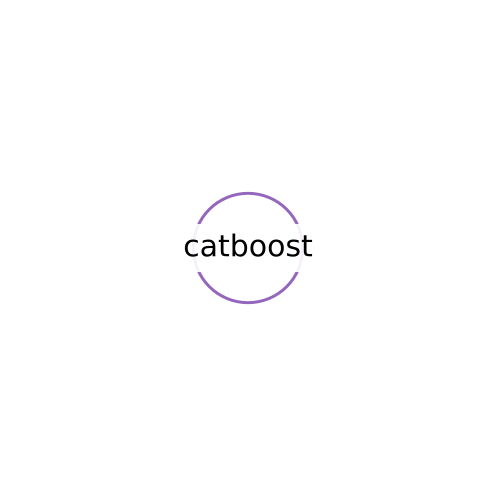

In [56]:
best_pipeline.show()

In [57]:
best_pipeline.save(settings.result_trained_model_filename(fedot_model_name))

('{\n    "total_pipeline_operations": [\n        "catboost"\n    ],\n    "depth": 1,\n    "nodes": [\n        {\n            "operation_id": 0,\n            "operation_type": "catboost",\n            "operation_name": "FedotCatBoostClassificationImplementation",\n            "custom_params": {\n                "n_jobs": 20,\n                "num_trees": 3000,\n                "learning_rate": 0.03,\n                "l2_leaf_reg": 0.01,\n                "bootstrap_type": "Bernoulli",\n                "grow_policy": "SymmetricTree",\n                "max_depth": 5,\n                "min_data_in_leaf": 1,\n                "one_hot_max_size": 10,\n                "fold_permutation_block": 1,\n                "boosting_type": "Plain",\n                "od_type": "Iter",\n                "od_wait": 100,\n                "max_bin": 32,\n                "feature_border_type": "GreedyLogSum",\n                "nan_mode": "Min",\n                "verbose": false,\n                "allow_writing_

### Подсчет метрик

In [58]:
# Импорт метрик для оценки качества моделей классификации
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve, 
    f1_score,  #f1-мера
    accuracy_score,  # Метрика точности для классификации
    classification_report,  # Отчет о классификации
    confusion_matrix
)

"""Посчитать метрики модели"""
f_y_train_pred = fedot_model.predict(features=fedot_train)
f_y_train_prob = fedot_model.predict_proba(fedot_train) #[:, 1]
f_y_test_pred = fedot_model.predict(features=fedot_test)
f_y_test_prob = fedot_model.predict_proba(fedot_test) #[:, 1]

# Расчет AUC-ROC
f_train_roc_auc = roc_auc_score(fedot_train.target, f_y_train_prob)
f_test_roc_auc = roc_auc_score(fedot_test.target, f_y_test_prob)
                             
# Поиск порога, максимизирующего F1-score
f_thresholds = np.arange(0.0, 1.0, 0.01)
f_f1_scores = [f1_score(fedot_test.target, f_y_test_prob >= t) for t in f_thresholds]
f_optimal_threshold = f_thresholds[np.argmax(f_f1_scores)]

# Пересчет метрик с учетом оптимального порога
f_y_train_pred_optimal = (f_y_train_prob >= f_optimal_threshold).astype(int)
f_y_test_pred_optimal = (f_y_test_prob >= f_optimal_threshold).astype(int)

f_train_precision = precision_score(fedot_train.target, f_y_train_pred_optimal)
f_test_precision = precision_score(fedot_test.target, f_y_test_pred_optimal)

f_train_recall = recall_score(fedot_train.target, f_y_train_pred_optimal)
f_test_recall = recall_score(fedot_test.target, f_y_test_pred_optimal)

f_train_accuracy = accuracy_score(fedot_train.target, f_y_train_pred_optimal)
f_test_accuracy = accuracy_score(fedot_test.target, f_y_test_pred_optimal)

f_train_f1_score = f1_score(fedot_train.target, f_y_train_pred_optimal)
f_test_f1_score = f1_score(fedot_test.target, f_y_test_pred_optimal)

### Визуализация метрик

In [59]:
import plotly.express as plotly_px
import plotly.graph_objects as plotly_go
import plotly.subplots as plotly_subplt

f_fig = plotly_subplt.make_subplots(rows=2, cols=2, 
                                subplot_titles=['ROC AUC', 'Metrics', 'Confusion Matrix Train', 'Confusion Matrix Test'],
                                vertical_spacing = 0.1,
                                row_width=[0.4, 0.6])
f_fig.update_layout(
    title_x=0.5,
    title_text="FEDOT",
    width = 1000,
    height = 800,
    legend = dict(yanchor="bottom", y=0.63, xanchor="right", x=0.44),
    margin = {'t':80, 'b':50, 'l':10, 'r':10}
    
)

# Построение ROC кривой
fpr_test, tpr_test, f_thresholds = roc_curve(fedot_test.target, fedot_model.predict_proba(features=fedot_test))
fpr_train, tpr_train, f_thresholds = roc_curve(fedot_train.target, fedot_model.predict_proba(features=fedot_train))
roc_train_g = plotly_go.Scatter(x=fpr_train, y=tpr_train, name="ROC curve Train", line={'color':'green'})
roc_test_g = plotly_go.Scatter(x=fpr_test, y=tpr_test, name="ROC curve Test", line={'color':'blue'})
roc_diag_g = plotly_go.Scatter(x=[0, 1], y=[0, 1], line={'color':'gray', 'dash': 'dash'}, showlegend=False)

f_fig.add_trace(roc_train_g, row=1, col=1)
f_fig.add_trace(roc_test_g, row=1, col=1)
f_fig.add_trace(roc_diag_g, row=1, col=1)

f_fig.update_layout(
    xaxis1 = {'title_text': "False Positive Rate"},
    yaxis1 = {'title_text': "True Positive Rate"}
)    

# Bar с метриками
df_metrics = pd.DataFrame([[f_test_accuracy,  f_train_accuracy],
                            [f_test_precision, f_train_precision],
                            [f_test_recall,    f_train_recall],
                            [f_test_roc_auc,   f_train_roc_auc],
                            [f_test_f1_score,  f_train_f1_score]], 
                            columns = ["Test", "Train"], 
                            index=["accuracy", "precision", "recall", "ROC AUC", "F1"])
metrics_train = plotly_go.Bar(x=df_metrics.index, y=df_metrics.Train, 
                showlegend=True, text=round(df_metrics.Train,4), textangle=0, 
                xaxis='x2', yaxis='y2', name="Train Metrics")
metrics_test = plotly_go.Bar(x=df_metrics.index, y=df_metrics.Test, 
                showlegend=True, text=round(df_metrics.Test,4), textangle=0, 
                xaxis='x2', yaxis='y2', name="Test Metrics")

f_fig.add_trace(metrics_train, row=1, col=2) 
f_fig.add_trace(metrics_test, row=1, col=2) 

train_cm = confusion_matrix(fedot_train.target, f_y_train_pred_optimal, normalize='all')
heatmap_train = plotly_go.Heatmap(z=train_cm, 
                                    x=['0', '1'], y=['0', '1'], 
                                    colorscale='Blues', 
                                    text=np.round(train_cm, 3), 
                                    texttemplate="%{text}", 
                                    showscale=False)

test_cm = confusion_matrix(fedot_test.target, f_y_test_pred_optimal, normalize='all')
heatmap_test = plotly_go.Heatmap(z=test_cm, 
                                    x=['0', '1'], y=['0', '1'], 
                                    colorscale='Blues', 
                                    text=np.round(test_cm, 3), 
                                    texttemplate="%{text}", 
                                    showscale=False)


f_fig.add_trace(heatmap_train, row=2, col=1)
f_fig.add_trace(heatmap_test,  row=2, col=2) 

f_fig.update_layout(
    xaxis1 = {'title': 'Predict'},
    xaxis2 = {'title': 'Predict'},
    yaxis1 = {'title': 'Goals'},
    yaxis2 = {'title': 'Goals'},
    xaxis3 = {'title': 'Предсказания'},
    xaxis4 = {'title': 'Предсказания'},
    yaxis3 = {'title': 'Факт'},
    yaxis4 = {'title': 'Факт'},
                
)    
f_fig.show()


In [66]:
fedot_metrics_as_dict = {'params': ModelClass.metrics_names(),
                'values': [
                    f_train_precision, f_test_precision,
                    f_train_recall,    f_test_recall,
                    f_train_roc_auc,   f_test_roc_auc,
                    f_train_accuracy,  f_test_accuracy,
                    f_train_f1_score,  f_test_f1_score
                ],
                'model_name': [fedot_model_name for i in range(len(ModelClass.metrics_names()))]
            }      

# Сравнительная таблица метрик разных моделей

In [67]:
df_stat = pd.concat([pd.DataFrame(knn_model.metrics()),
                     pd.DataFrame(svc_model.metrics()),
                     pd.DataFrame(rfc_model.metrics()),
                     pd.DataFrame(logreg_model.metrics()),
                     pd.DataFrame(dtc_model.metrics()),
                     pd.DataFrame(fedot_metrics_as_dict)
                     ])
columns = ['model_name']
columns = columns + ModelClass.metrics_names()
df_stat2 = df_stat.pivot_table(columns = 'params',
                            index='model_name',
                            values='values').reset_index()[columns]
df_stat2

params,model_name,Training_Precision,Test_Precision,Training_Recall,Test_Recall,ROC_AUC_Train,ROC_AUC_Test,Accuarcy_Train,Accuarcy_Test,F1_score_Train,F1_score_Test
0,DTC_sklearn,0.58231,0.57998,0.95075,0.95102,0.77995,0.76981,0.63735,0.63414,0.72226,0.72054
1,KNN_sklearn,0.66686,0.64813,0.86518,0.84530,0.82211,0.77955,0.71877,0.69568,0.75318,0.73370
2,LogisticR_sklearn,0.65561,0.65263,0.86475,0.86627,0.80251,0.79900,0.70763,0.70501,0.74579,0.74443
3,RFC_sklearn,0.68403,0.65756,0.88519,0.85421,0.84648,0.80163,0.74027,0.70708,0.77172,0.74310
4,SVC_sklearn,0.73964,0.67219,0.86672,0.81643,0.87755,0.78701,0.78258,0.71150,0.79815,0.73732
5,fedot,0.67165,0.65976,0.87907,0.86428,0.83181,0.81289,0.72689,0.71161,0.76148,0.74830


Наибольшая доля правильных предсказаний (accuracy) у моделей SupportVectorMachine и CatBoost(fedot) - 0.71 на тестовой выборке.
Лучше всего положительные классы предстказывает SupportVectorMachine - 0.67.
Наиболее сбалансированной получается модель Catboost, выбранная с помощью FEDOT - F1=0.75